In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# interactive in the notebook
# %matplotlib notebook

# inlined but not interactive
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from kohonen import load_data, build_and_train

### Init

In [4]:
data, labels, target_digits = load_data()  # default name

Your digits:  [2 3 5 7]
Loading from binary...


In [17]:
# Kohonen algorithm hyper-parameters
size_k = 6        # size of the Kohonen map (size_k, size_k)
sigma  = 3        # width of the gaussian neighborhood
eta    = 0.01      # learning rate
# tmax   = 3*2000  # max iteration count; substitutes convergence criterion
tmax   = 4000  # max iteration count; substitutes convergence criterion

# initialise the centers randomly
dim = data.shape[1]     # 28*28 = 784
data_range = 255.0
centers = np.random.rand(size_k**2, dim) * data_range

# build a neighborhood matrix
neighbor = np.arange(size_k**2).reshape((size_k, size_k))

# set the random order in which the datapoints should be presented
idxs_random = np.arange(tmax) % data.shape[0]
np.random.shuffle(idxs_random)

### Training

In [18]:
scores = []
for step, idx in enumerate(idxs_random):
    movement, winner = som_step(centers, data[idx,:],neighbor,eta,sigma)
    if step %  50 == 0:
        scores.append(score(centers, data))
    if step % 500 == 0:
        print(step/tmax*100, end=', ')

0.0, 12.5, 25.0, 37.5, 50.0, 62.5, 75.0, 87.5, 

### Display

In [25]:
sigma = 3
epoch=50
etas = [0.9, 0.5, 0.3, 0.1, 0.05]
all_centers, all_scores = [], []
for eta in etas:
    centers, scores = build_and_train(data, eta=eta, tmax=2500, sigma=sigma, epoch=epoch, seed=6)
    all_centers.append(centers)
    all_scores.append(scores)

0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100%
0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100%
0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100%
0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100%
0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100%


<IPython.core.display.Javascript object>


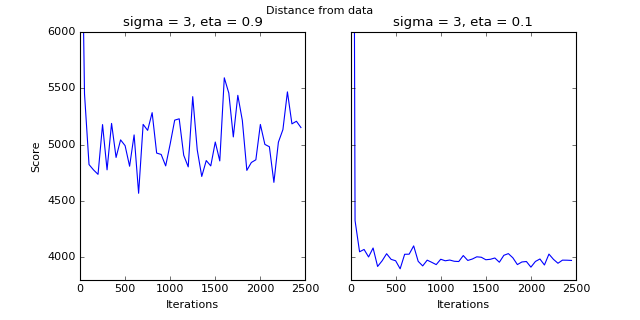

In [74]:
%matplotlib notebook
f, (s1, s2) = plt.subplots(1, 2, sharey=True, figsize=(8,4))
x = np.arange(0, len(all_scores[3]) * epoch, epoch)
# f.ylim(3800,5500)
# s = f.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')

s1.set_xlabel('Iterations')
s2.set_xlabel('Iterations')
s1.set_ylim(3800, 6000)
# s2.set_ylim(0, 6000)

s1.set_ylabel('Score')

s1.set_title('sigma = 3, eta = %.1f' % etas[0])
s2.set_title('sigma = 3, eta = %.1f' % etas[3])

s1.plot(x, all_scores[0])
s2.plot(x, all_scores[3])

f.suptitle('Distance from data')

# plt.savefig('dist_datax')

In [97]:
centers, _ = build_and_train(data, sigma=1, tmax=2500)

0.0%, 10.0%, 20.0%, 30.0%, 40.0%, 50.0%, 60.0%, 70.0%, 80.0%, 90.0%, 100%


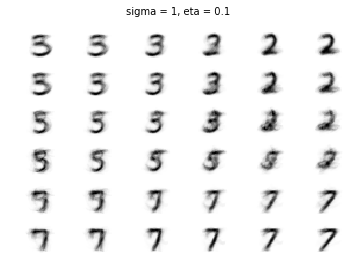

In [98]:
%matplotlib inline
# show centers
# f = plt.figure()
plt.suptitle('sigma = 1, eta = 0.1')
for j in range(6 ** 2):
    plt.subplot(6, 6, j + 1)
    plt.imshow(np.reshape(centers[j, :], [28, 28]), interpolation='nearest', cmap='Greys')
    plt.axis('off')
# plt.savefig('som3.png')

In [96]:
std_devs = np.array(all_scores)
np.std(std_devs[:, 10:], axis=1)

array([ 234.49084314,  135.41656848,   79.08125652,   36.56581811,
         20.65571828])

In [84]:
std_devs = np

np.std(all_scores[0][10:])
# len(all_scores[0])

234.49084314251249

In [ ]:
def predictNeurons(centers, data, labels, target_digits):
    accumul = np.zeros((len(centers),4))
    for i in range(2000):
        winner = np.argmin(np.sum(centers - data[i], axis=1)**2)
        accumul[winner,target_digits==labels[i]] += 1
    for j in range(len(centers)):
        accumul[j] = target_digits[np.argmax(accumul[j])]
    return accumul[:,0]

In [ ]:
predictNeurons(centers, data, labels, target_digits)


In [ ]:
plt.imshow(np.reshape(data[1], [28, 28]))
# plt.show()

In [ ]:
labels[1]

In [ ]:
neighbor